# Recommendation Engine

Recommendation system is just as what its meaning is a suggestion or proposal as to the best course of action, especially one put forward by an authoritative body, the action of recommending something to someone.

Recommender System is a software system that provides specific suggestions to users according to their preferences. These techniques may provide decision-making capabilities to the user. Items refer to any product that the recommender system suggests to its user like movies, music, news, travel packages, e-commerce products, etc.
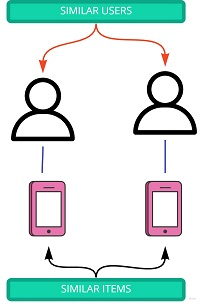

A Recommender system is built for a specific type of application depending on the items it recommends. Recommender system development emerged from the general idea that individuals rely on others to take regular decisions in their life. The explosive growth in volume and variety of information available on the web has contributed to the development of recommender systems which has, in turn, led to an increase in profit and benefits to the user.

### Types of Recommender Systems
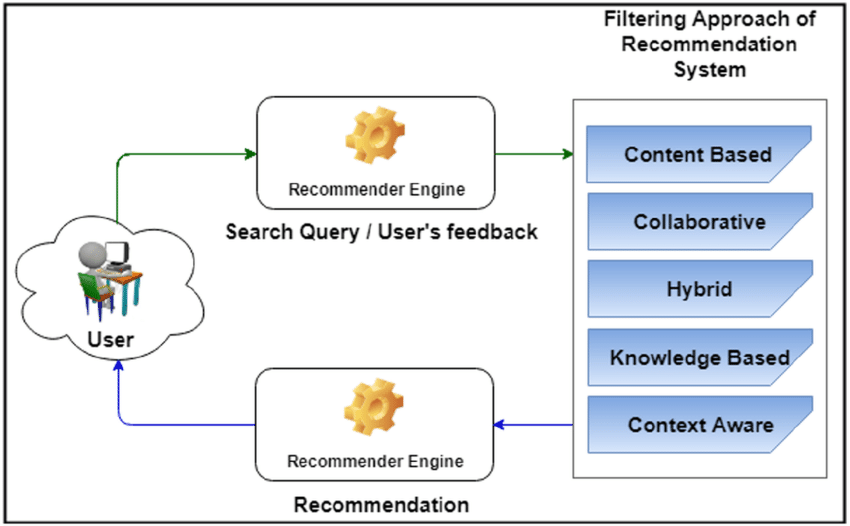
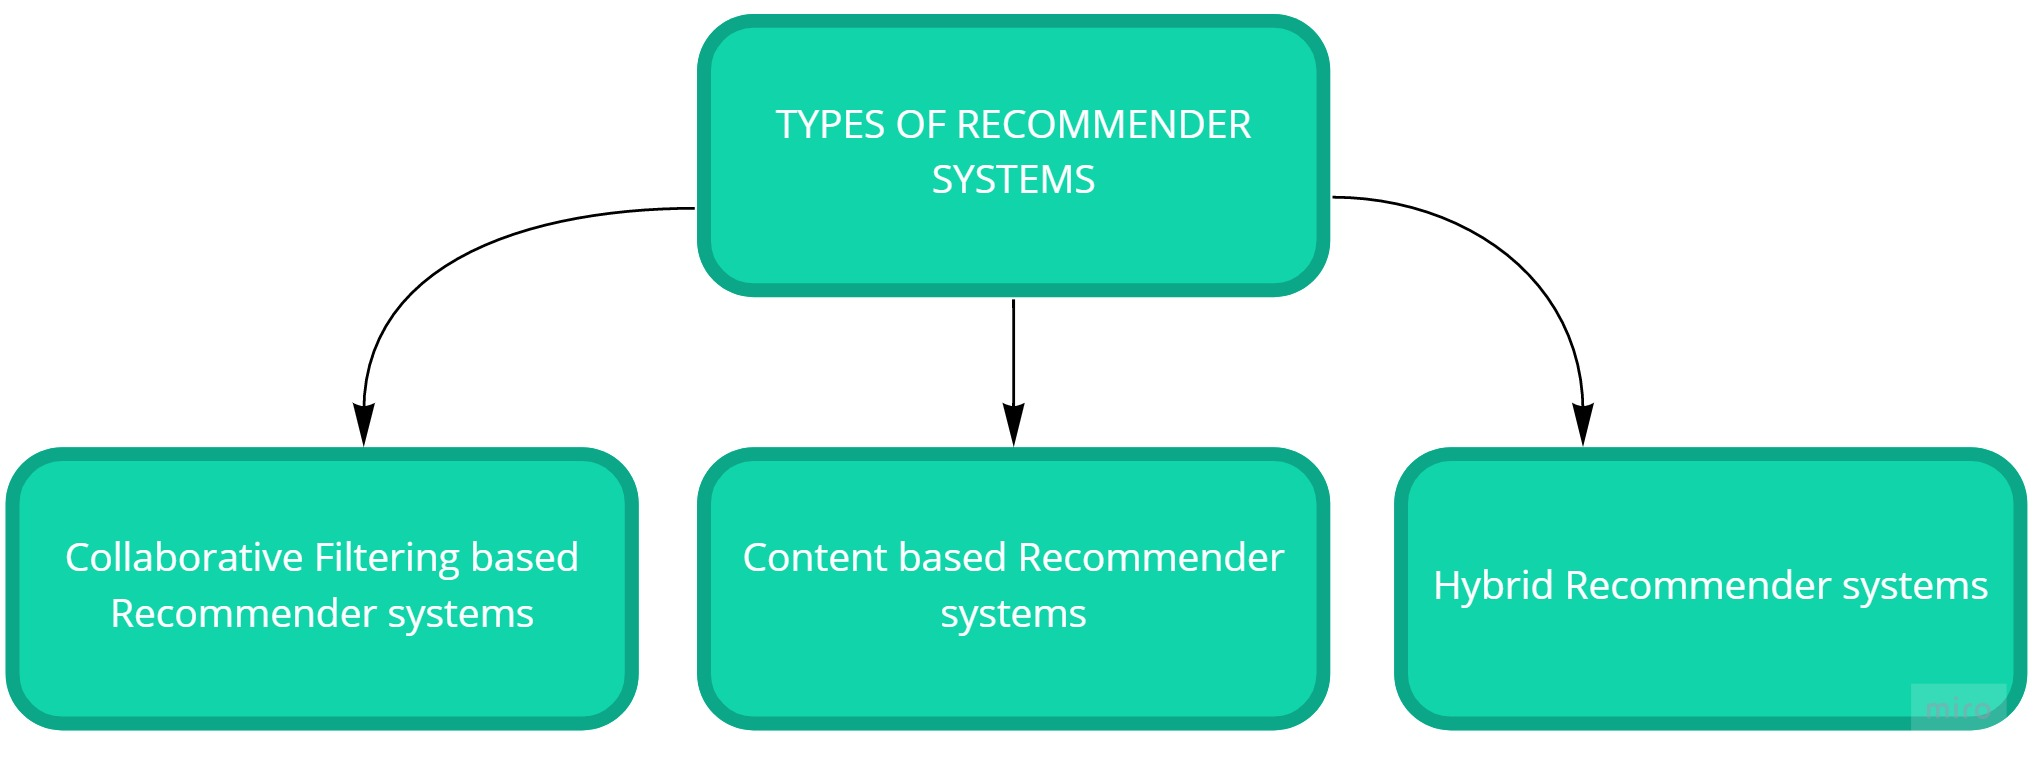


1. Collaborative filtering-based systems:These systems recommend items to users based on the similarity computation of these users to similar users in the system or based on the items similar to the items liked by the user in past. 
    i) user-based collaborative filtering– The recommender system tries to find out similar users to the target user by calculating certain similarity measures and then suggest items to the target user based on similar user preferences. Similarity calculation is an important task here.
    ii.) item-based collaborative filtering– The recommender system tries to find out items based on previous user preferences of the user and then recommend similar items to the user. These items might be of interest to the user.

2. Content-based Recommender Systems:The system focuses on the properties of the items to be suggested to the users. For example, if a YouTube user has watched comedy videos then the system will recommend comedy genre videos to him. 

3. Hybrid Systems:  These systems are a combination of collaborative and content-based systems.


## Why Recommender System?

Well, the data collection is increasing day by daya and the data is being used to create more efficient systems. Recommendation System are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are related to the search history of the user.

They are used to predict the user interest to an item. Youtube uses this system to decide which video to play next on autoplay. Netflix Amazon uses this system to to predict the movies on the intrest of the user for there sucess.

So we are using TMD500 Movie Dataset & The Movies Dataset for the foundation in recommendation system.

So, before starting lets again revise the types of recommender system:-

1. Demographic Filtering- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. In short we recommend to every user what is overall trending in the market so sometimes if a user want to go beyond his interest and can create interest in someother field aswell.

2. Content Based Filtering- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it. so, this system uses items inner content to make recommendations.

3. Collaborative Filtering- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts. So, this system is just like matching one user to another based on similar interests.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

In [2]:
tmd1_credit= pd.read_csv('tmdb_5000_credits.csv')
tmd1_movies= pd.read_csv('tmdb_5000_movies.csv')

## Dataset Description

About this Dataset
Background
What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

Data Source Transfer Summary
We (Kaggle) have removed the original version of this dataset per a DMCA takedown request from IMDB. In order to minimize the impact, we're replacing it with a similar set of films and data fields from The Movie Database (TMDb) in accordance with their terms of use. The bad news is that kernels built on the old dataset will most likely no longer work.

The good news is that:

You can port your existing kernels over with a bit of editing. This kernel offers functions and examples for doing so. You can also find a general introduction to the new format here.

The new dataset contains full credits for both the cast and the crew, rather than just the first three actors.

Actor and actresses are now listed in the order they appear in the credits. It's unclear what ordering the original dataset used; for the movies I spot checked it didn't line up with either the credits order or IMDB's stars order.

The revenues appear to be more current. For example, IMDB's figures for Avatar seem to be from 2010 and understate the film's global revenues by over $2 billion.

Some of the movies that we weren't able to port over (a couple of hundred) were just bad entries. For example, this IMDB entry has basically no accurate information at all. It lists Star Wars Episode VII as a documentary.

Data Source Transfer Details
Several of the new columns contain json. You can save a bit of time by porting the load data functions [from this kernel]().

Even in simple fields like runtime may not be consistent across versions. For example, previous dataset shows the duration for Avatar's extended cut while TMDB shows the time for the original version.

There's now a separate file containing the full credits for both the cast and crew.

All fields are filled out by users so don't expect them to agree on keywords, genres, ratings, or the like.

Your existing kernels will continue to render normally until they are re-run.

If you are curious about how this dataset was prepared, the code to access TMDb's API is posted here.

New columns:

homepage

id

original_title

overview

popularity

production_companies

production_countries

release_date

spoken_languages

status

tagline

vote_average

Lost columns:

actor1facebook_likes

actor2facebook_likes

actor3facebook_likes

aspect_ratio

casttotalfacebook_likes

color

content_rating

directorfacebooklikes

facenumberinposter

moviefacebooklikes

movieimdblink

numcriticfor_reviews

numuserfor_reviews

Open Questions About the Data
There are some things we haven't had a chance to confirm about the new dataset. If you have any insights, please let us know in the forums!

Are the budgets and revenues all in US dollars? Do they consistently show the global revenues?

This dataset hasn't yet gone through a data quality analysis. Can you find any obvious corrections? For example, in the IMDb version it was necessary to treat values of zero in the budget field as missing. Similar findings would be very helpful to your fellow Kagglers! (It's probably a good idea to keep treating zeros as missing, with the caveat that missing budgets much more likely to have been from small budget films in the first place).

Inspiration
Can you categorize the films by type, such as animated or not? We don't have explicit labels for this, but it should be possible to build them from the crew's job titles.

How sharp is the divide between major film studios and the independents? Do those two groups fall naturally out of a clustering analysis or is something more complicated going on?

Acknowledgements
This dataset was generated from The Movie Database API. This product uses the TMDb API but is not endorsed or certified by TMDb.
Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows. You can try it for yourself here.

The dataset is taken from: https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system/data

In [3]:
tmd1_credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
tmd1_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


The first dataset contains the following features:-

    movie_id - A unique identifier for each movie.
    cast - The name of lead and supporting actors.
    crew - The name of Director, Editor, Composer, Writer etc.
    The second dataset has the following features:-
    budget - The budget in which the movie was made.
    genre - The genre of the movie, Action, Comedy ,Thriller etc.
    homepage - A link to the homepage of the movie.
    id - This is infact the movie_id as in the first dataset.
    keywords - The keywords or tags related to the movie.
    original_language - The language in which the movie was made.
    original_title - The title of the movie before translation or adaptation. 
    overview - A brief description of the movie.
    popularity - A numeric quantity specifying the movie popularity.
    production_companies - The production house of the movie.
    production_countries - The country in which it was produced.
    release_date - The date on which it was released.
    revenue - The worldwide revenue generated by the movie.
    runtime - The running time of the movie in minutes.
    status - "Released" or "Rumored".
    tagline - Movie's tagline.
    title - Title of the movie.
    vote_average - average ratings the movie recieved.
    vote_count - the count of votes recieved.
Let's join the two dataset on the 'id' column

In [5]:
# We will change the column name on movie id of both dataset to be same
tmd1_movies= tmd1_movies.rename(columns={'id':'movie_id'})
tmd1_movies.head(2)

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [6]:
# Now first we will merge the first dataset with the second
tmd1_movies=tmd1_movies.merge(tmd1_credit,on='movie_id')
tmd1_movies

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlywe

In [7]:
tmd1_movies.head(2)

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


# Demographic Filtering -

First task: The first task is to score movies or rate movies. We will calculate the score for every movies. Sort the score and recommend the best rated movies to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-
We can summarize this as 'Avatar' movie average vote is 7.2 and number of vote count is 11800 & 'The Legend Ends' movie average vote is 7.6 and number of vote count is just only 9106 which can't be possible,   
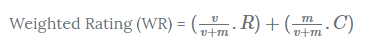

where,

    v is the number of votes for the movie;
    m is the minimum votes required to be listed in the chart;
    R is the average rating of the movie; And
    C is the mean vote across the whole report
We already have v(vote_count) and R (vote_average) and C can be calculated as

In [8]:
# calculate mean vote across the whole report
C= tmd1_movies['vote_average'].mean()
C

6.092171559442011

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [9]:
# calculate the minimum votes required to be listed in the chart
m= tmd1_movies['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, we can filter out the movies that qualify for the chart

In [10]:
qualify_movielist= tmd1_movies.copy().loc[tmd1_movies['vote_count']>=m]
qualify_movielist.shape

(481, 23)

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:
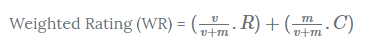

where,

    v is the number of votes for the movie;
    m is the minimum votes required to be listed in the chart;
    R is the average rating of the movie; And
    C is the mean vote across the whole report
We already have v(vote_count) and R (vote_average) and C can be calculated as

In [11]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [12]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
qualify_movielist['score'] = qualify_movielist.apply(weighted_rating, axis=1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [13]:
#Sort movies based on score calculated above
qualify_movielist = qualify_movielist.sort_values('score', ascending=False)

#Print the top 15 movies
qualify_movielist[['title_x', 'vote_count', 'vote_average', 'score']].head(10)

,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


So, we have developed a recommendation system under Trending Now tab. 

In [14]:
tmd1_movies.columns

Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title_x', 'vote_average', 'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

Text(0.5, 1.0, 'Popular Movies')

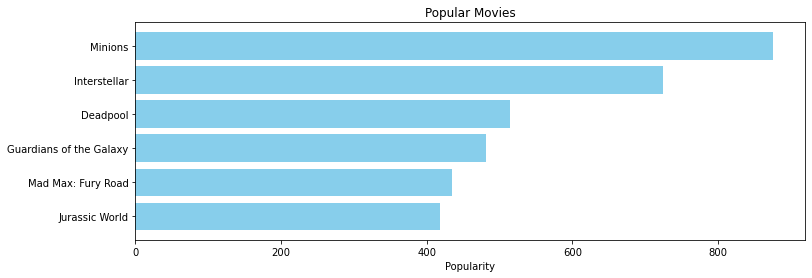

In [15]:
pop= tmd1_movies.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title_x'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

The above graph recommender provide general chart of recommender to all the users. They are not showing as on the interest of the users. So, we will now do Content Based Filtering.

### Content Based Filtering

In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.
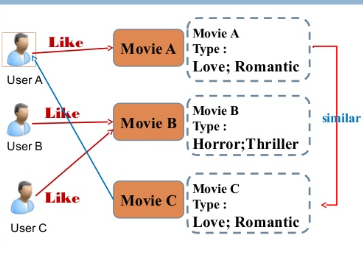
#### Plot description based Recommender
We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset. 


In [16]:
tmd1_movies.overview

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

So, here we will do text processing that is we need to convert the word vector of each overview. Here we will use Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.So, before processing lets understand what is TF-IDF (Term Frequency-Inverse Document Frequency).

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

Terminologies:

Term Frequency: 
In document d, the frequency represents the number of instances of a given word t. Therefore, we can see that it becomes more relevant when a word appears in the text, which is rational. Since the ordering of terms is not significant, we can use a vector to describe the text in the bag of term models.The weight of a term that occurs in a document is simply proportional to the term frequency.It just check the word in the text for its occurence.

tf(t,d) = count of t in d / number of words in d

Document Frequency: This tests the meaning of the text, which is very similar to TF, in the whole corpus collection. The only difference is that in document d, TF is the frequency counter for a term t, while df is the number of occurrences in the document set N of the term t. In other words, the number of papers in which the word is present is DF.It check the word in the document.

df(t) = occurrence of t in documents

Inverse Document Frequency: Mainly, it tests how relevant the word is. The key aim of the search is to locate the appropriate records that fit the demand. Since tf considers all terms equally significant, it is therefore not only possible to use the term frequencies to measure the weight of the term in the paper. First, find the document frequency of a term t by counting the number of documents containing the term:

df(t) = N(t)

where

df(t) = Document frequency of a term t

N(t) = Number of documents containing the term t

Term frequency is the number of instances of a term in a single document only; although the frequency of the document is the number of separate documents in which the term appears, it depends on the entire corpus. Now let’s look at the definition of the frequency of the inverse paper. The IDF of the word is the number of documents in the corpus separated by the frequency of the text.

idf(t) = N/ df(t) = N/N(t)

The more common word is supposed to be considered less significant, but the element (most definite integers) seems too harsh. We then take the logarithm (with base 2) of the inverse frequency of the paper. So the if of the term t becomes:

idf(t) = log(N/ df(t))

Computation: Tf-idf is one of the best metrics to determine how significant a term is to a text in a series or a corpus. tf-idf is a weighting system that assigns a weight to each word in a document based on its term frequency (tf) and the reciprocal document frequency (tf) (idf). The words with higher scores of weight are deemed to be more significant.

Usually, the tf-idf weight consists of two terms-
1. Normalized Term Frequency (tf)
2. Inverse Document Frequency (idf)

tf-idf(t, d) = tf(t, d) * idf(t)

In python tf-idf values can be computed using TfidfVectorizer() method in sklearn module. 

Syntax:

    sklearn.feature_extraction.text.TfidfVectorizer(input)
Returns:

    fit_transform(): It returns an array of terms along with tf-idf values.
    get_feature_names(): It returns a list of feature names.

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [17]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [18]:
#Replace NaN with an empty string
tmd1_movies['overview'] = tmd1_movies['overview'].fillna('')

In [19]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(tmd1_movies['overview'])

In [20]:
#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
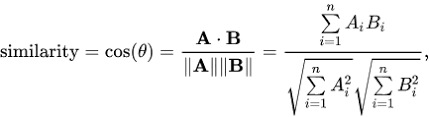
Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.


In [21]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [22]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(tmd1_movies.index, index=tmd1_movies['title_x']).drop_duplicates()

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

    Get the index of the movie given its title.
    Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
    Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
    Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
    Return the titles corresponding to the indices of the top elements.

In [23]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title_x, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title_x]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return tmd1_movies['title_x'].iloc[movie_indices]

In [24]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title_x, dtype: object

In [25]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_x, dtype: object

the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

#### Credits, Genres and Keywords Based Recommender

It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [26]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    tmd1_movies[feature] = tmd1_movies[feature].apply(literal_eval)

In [27]:
#Next, we'll write functions that will help us to extract the required information from each feature.

# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [28]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [29]:
# Define new director, cast, genres and keywords features that are in a suitable form.
tmd1_movies['director'] = tmd1_movies['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    tmd1_movies[feature] = tmd1_movies[feature].apply(get_list)

In [30]:
# Print the new features of the first 3 films
tmd1_movies[['title_x', 'cast', 'director', 'keywords', 'genres']].head(3)

,title_x,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same

In [31]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [32]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    tmd1_movies[feature] = tmd1_movies[feature].apply(clean_data)

In [33]:
tmd1_movies.head(2)

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski


We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [34]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
tmd1_movies['soup'] = tmd1_movies.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [35]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(tmd1_movies['soup'])

In [36]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [37]:
# Reset index of our main DataFrame and construct reverse mapping as before
tmd1_movies = tmd1_movies.reset_index()
indices = pd.Series(tmd1_movies.index, index=tmd1_movies['title_x'])

We can now reuse our get_recommendations() function by passing in the new cosine_sim2 matrix as your second argument.

In [38]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title_x, dtype: object

In [39]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title_x, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add production_company . We can also increase the weight of the director , by adding the feature multiple times in the soup.

### Collaborative Filtering

our model it is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers. It is basically of two types:-

User based filtering- These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity. This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.
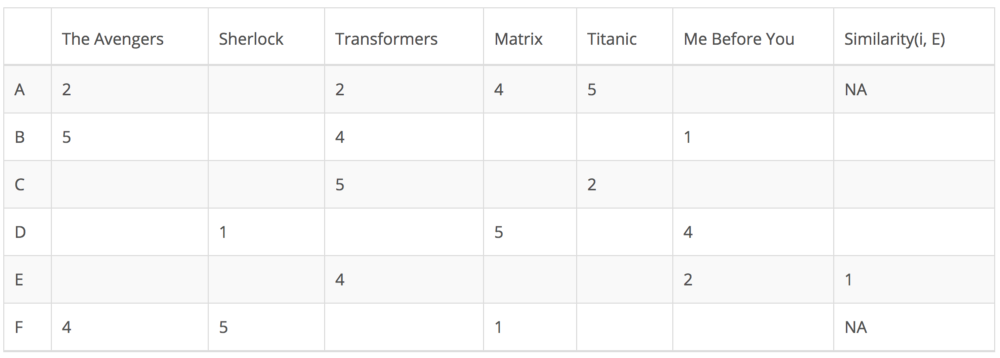
Since user A and F do not share any movie ratings in common with user E, their similarities with user E are not defined in Pearson Correlation. Therefore, we only need to consider user B, C, and D. Based on Pearson Correlation, we can compute the following similarity.
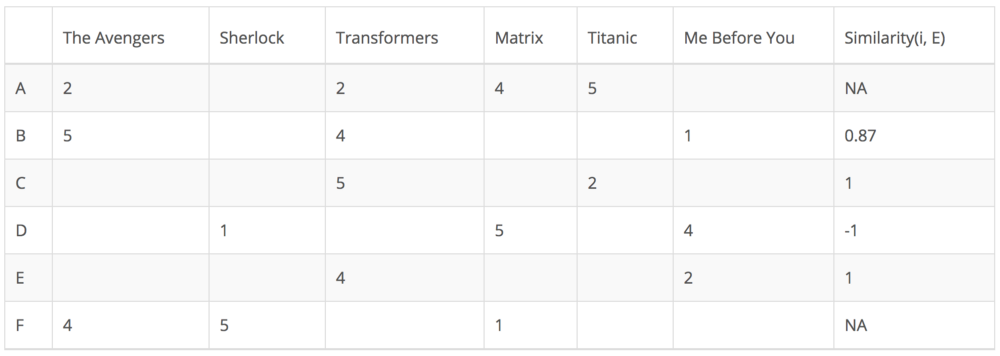
From the above table we can see that user D is very different from user E as the Pearson Correlation between them is negative. He rated Me Before You higher than his rating average, while user E did the opposite. Now, we can start to fill in the blank for the movies that user E has not rated based on other users.
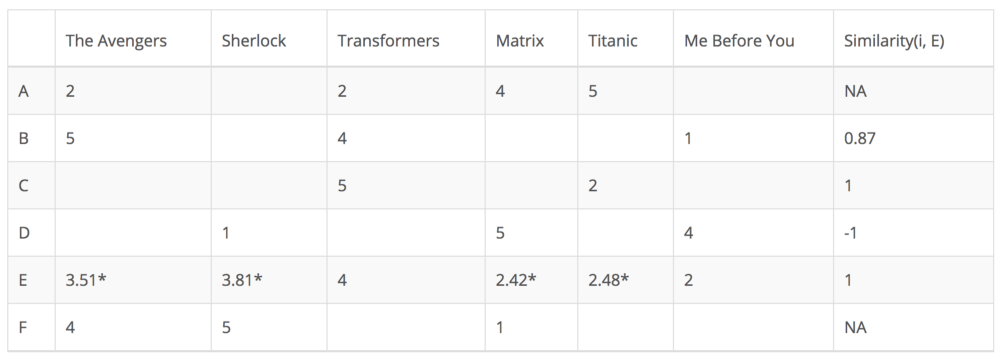
Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.
Item Based Collaborative Filtering - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated.with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does.
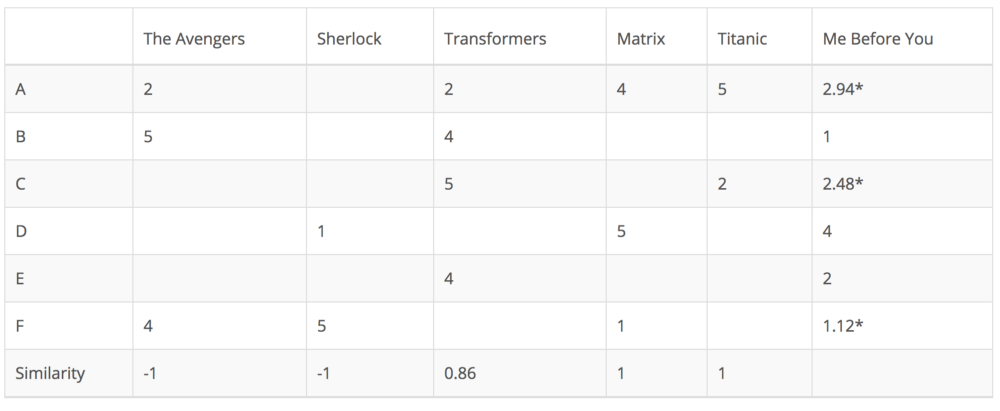
It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is scalability. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, sparsity is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.

#### Single Value Decomposition

One way to handle the scalability and sparsity issue created by CF is to leverage a latent factor model to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). The lower the RMSE, the better the performance.


In [40]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
import pandas as pd
import numpy as np
reader = Reader()
ratings= pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [41]:
#Note that in this dataset movies are rated on a scale of 5 unlike the earlier one.
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
svd= SVD()
# Run 5-fold cross-validation and then print results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8999  0.9022  0.8950  0.8864  0.8934  0.8954  0.0055  
MAE (testset)     0.6906  0.6925  0.6902  0.6843  0.6878  0.6891  0.0028  
Fit time          4.62    4.51    4.47    4.51    4.41    4.50    0.07    
Test time         0.13    0.12    0.12    0.23    0.13    0.15    0.04    


{'test_rmse': array([0.89989532, 0.90217922, 0.89504749, 0.88643632, 0.89339609]),
 'test_mae': array([0.6906106 , 0.69252498, 0.69021835, 0.68429936, 0.68784507]),
 'fit_time': (4.61643385887146,
  4.514471054077148,
  4.4672532081604,
  4.510660886764526,
  4.405339241027832),
 'test_time': (0.12682747840881348,
  0.12267231941223145,
  0.12265539169311523,
  0.23144984245300293,
  0.1254105567932129)}

We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [42]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [43]:
#Let us pick user with user Id 1 and check the ratings she/he has given.
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [44]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7365229240350786, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of 2.618. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, Hybrid Systems can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary. This model was very baseline and only provides a fundamental framework to start with.

The above practise code taken from:- https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system/notebook

In [45]:
#conda install -c conda-forge scikit-surprise